In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
df.drop(columns = ['id', 'name', 'host_id', 'last_review', 'latitude', 'longitude'], inplace=True )
df.head()

,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_name                       48874 non-null  object 
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.7+ MB


In [19]:
df['reviews_per_month'].fillna(0)
df.head()

,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_name                       48874 non-null  object 
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.7+ MB


In [35]:
df = df[(df['price']>0) & (df['price'] < 1000)]
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 48586 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_name                       48565 non-null  object 
 1   neighbourhood_group             48586 non-null  object 
 2   neighbourhood                   48586 non-null  object 
 3   room_type                       48586 non-null  object 
 4   price                           48586 non-null  int64  
 5   minimum_nights                  48586 non-null  int64  
 6   number_of_reviews               48586 non-null  int64  
 7   reviews_per_month               48586 non-null  float64
 8   calculated_host_listings_count  48586 non-null  int64  
 9   availability_365                48586 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 4.1+ MB
None
              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48586.000000 

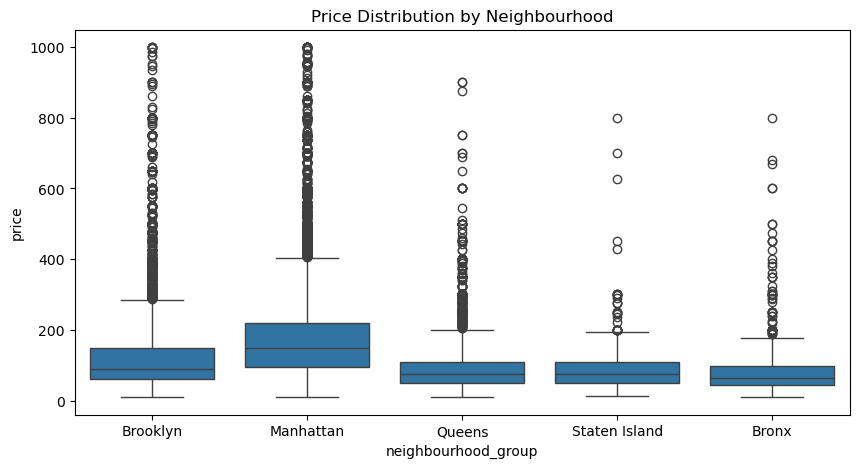

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x='neighbourhood_group', y='price',data=df)
plt.title('Price Distribution by Neighbourhood')
plt.show()

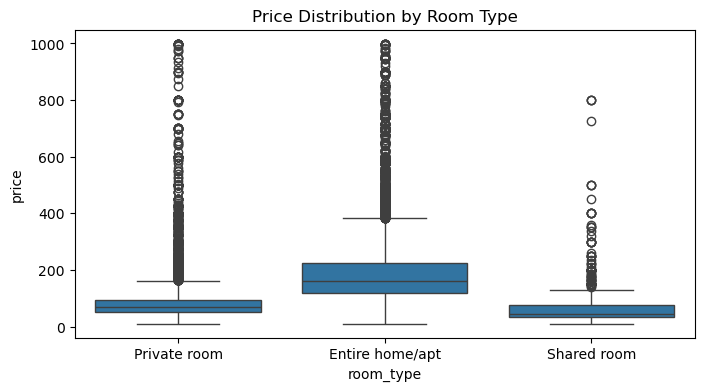

In [45]:
plt.figure(figsize=(8,4))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.show()

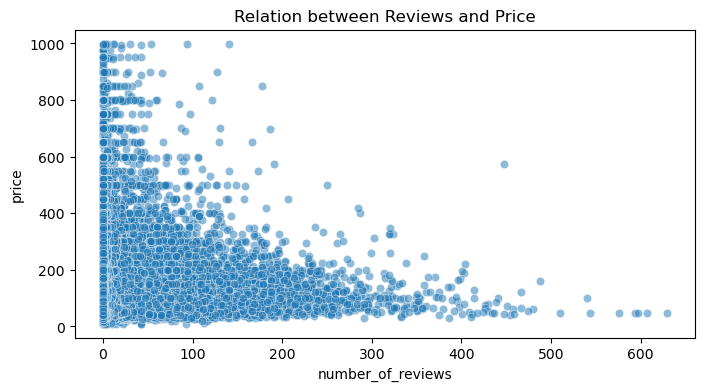

In [55]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='number_of_reviews',y='price',data=df,alpha=0.5)
plt.title('Relation between Reviews and Price')
plt.show()

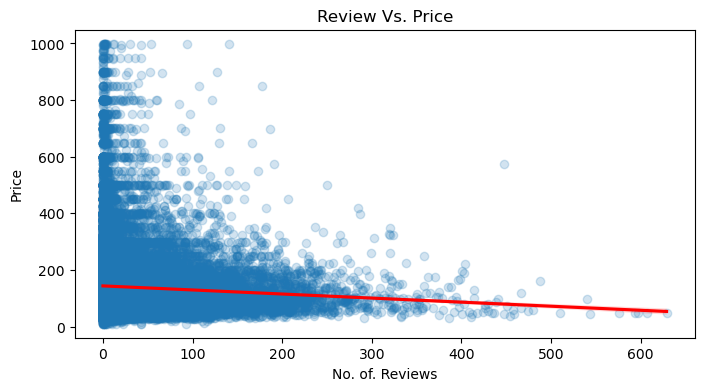

In [63]:
plt.figure(figsize=(8,4))
sns.regplot(x='number_of_reviews',y='price',data=df,scatter_kws={'alpha':0.2},line_kws={'color':'red'})
plt.title('Review Vs. Price')
plt.xlabel('No. of. Reviews')
plt.ylabel('Price')
plt.show()

In [85]:
df_dummies = pd.get_dummies(df[['neighbourhood_group', 'room_type']],drop_first=True,dtype='int')
X=pd.concat([df[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 
                 'calculated_host_listings_count']],df_dummies],axis=1)
y=df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('MAE: ', mean_absolute_error(y_test,y_pred))
print('RMSE: ', root_mean_squared_error(y_test,y_pred))
print('R^2 Score: ', r2_score(y_test,y_pred))

MAE:  56.57310531393352
RMSE:  94.48987111178059
R^2 Score:  0.30451371813641603


In [105]:
def predict_price(input_dict): 
    input_df = pd.DataFrame([input_dict])
    input_df_encoded = pd.get_dummies(input_df).reindex(columns=X.columns,fill_value=0)
    return round(model.predict(input_df_encoded)[0],2)

example = {'minimum_nights':3,
          'number_of_reviews': 25,
          'reviews_per_month': 1.5,
          'availability_365': 300,
          'calculated_host_listings_count': 2,
          'neighbourhood_group_Brooklyn': 1,
          'neighbourhood_group_Manhattan': 0,
          'neighbourhood_group_Queens': 0,
          'neighbourhood_group_Staten Island': 0,
          'room_type_Private room': 1,
          'room_type_Shared room': 0}
print('Predicted Price: $',predict_price(example))

Predicted Price: $ 97.24
